In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [44]:
# --- Build Stronger Model ---
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_6 (Rescaling)         │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,474 (6.65 MB)

 Trainable params: 1,740,682 (6.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [46]:
# --- Compile ---
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
# --- Callbacks ---
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_cifar10_dense_model.h5', monitor='val_accuracy',
    save_best_only=True, mode='max', verbose=1
)

In [54]:
# --- Train ---
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=128,
    callbacks=[early_stop, checkpoint],
    verbose=2
)



Epoch 1/100

Epoch 1: val_accuracy did not improve from 0.52810
313/313 - 2s - 5ms/step - accuracy: 0.5338 - loss: 1.2979 - val_accuracy: 0.4933 - val_loss: 1.4496
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.52810
313/313 - 2s - 7ms/step - accuracy: 0.5362 - loss: 1.2922 - val_accuracy: 0.5100 - val_loss: 1.3648
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.52810
313/313 - 3s - 9ms/step - accuracy: 0.5357 - loss: 1.2988 - val_accuracy: 0.4421 - val_loss: 1.6143
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.52810
313/313 - 2s - 7ms/step - accuracy: 0.5411 - loss: 1.2875 - val_accuracy: 0.5206 - val_loss: 1.3529
Epoch 5/100

Epoch 5: val_accuracy did not improve from 0.52810
313/313 - 2s - 8ms/step - accuracy: 0.5403 - loss: 1.2880 - val_accuracy: 0.5044 - val_loss: 1.3766
Epoch 6/100

Epoch 6: val_accuracy did not improve from 0.52810
313/313 - 1s - 4ms/step - accuracy: 0.5390 - loss: 1.2886 - val_accuracy: 0.5039 - val_loss: 1.3924
Epoch 7/100

Epo

In [55]:
# --- Best Accuracy ---
best_val_acc = max(history.history['val_accuracy'])
best_train_acc = max(history.history['accuracy'])
print(f"Best Train Accuracy: {best_train_acc:.4f}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")


Best Train Accuracy: 0.5468
Best Validation Accuracy: 0.5245


In [56]:
# --- Load Best Model for Testing ---
best_model = tf.keras.models.load_model('best_cifar10_dense_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.5283
Test Loss: 1.3216


In [57]:
# --- Predictions ---
predictions = best_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


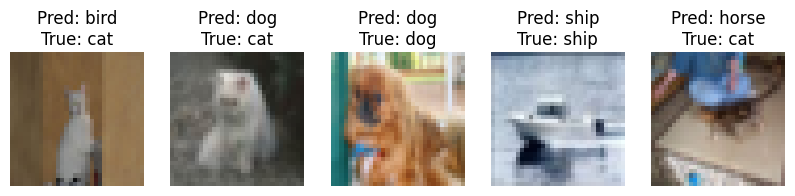

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# --- Show 5 random test images ---
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i, idx in enumerate(np.random.choice(len(x_test), 5, replace=False)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"Pred: {class_names[predicted_classes[idx]]}\nTrue: {class_names[y_test[idx]]}")
    plt.axis('off')
plt.show()

